IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

LOAD DATASET

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)


In [8]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Model Evaluation - Logistic Regression:
Accuracy: 0.81
Precision: 0.59
Recall: 0.23
F1 Score: 0.33


Model Evaluation - Random Forest:
Accuracy: 0.86
Precision: 0.73
Recall: 0.47
F1 Score: 0.57


Model Evaluation - Gradient Boosting:
Accuracy: 0.86
Precision: 0.75
Recall: 0.48
F1 Score: 0.58




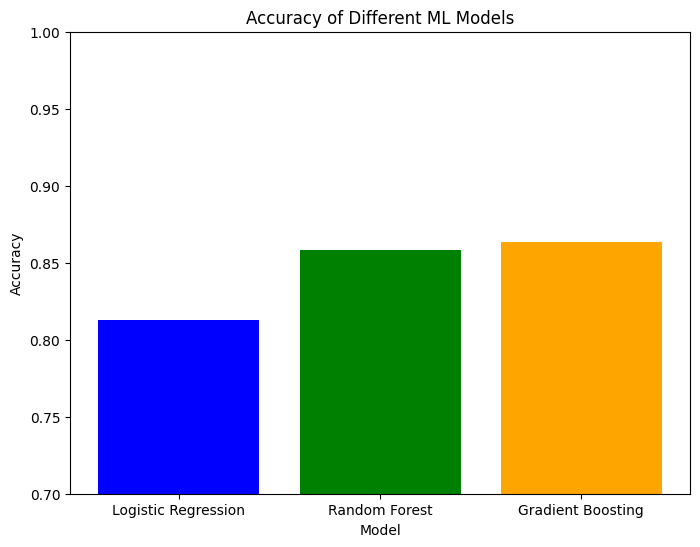

In [9]:

X = df.drop("Exited", axis=1)
y = df["Exited"]

X = pd.get_dummies(X, columns=["Geography", "Gender"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()


model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting"]
models = [logistic_regression, random_forest, gradient_boosting]
accuracies = []

for model_name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
  

    print(f"Model Evaluation - {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")


plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')
plt.ylim(0.7, 1.0) 
plt.show()

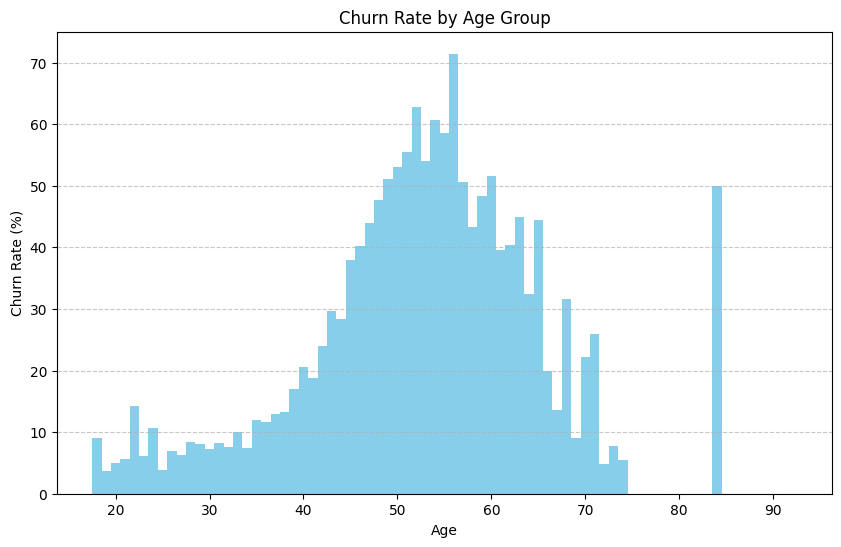

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

age_groups = df.groupby('Age')['Exited'].mean() * 100

plt.figure(figsize=(10, 6))
plt.bar(age_groups.index, age_groups.values, width=1.0, align='center', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
